In [45]:
# This section enables to use the module code referenced in the repo
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [46]:
from arcus.ml.images import *
import numpy as np

## Demonstration of how to load images from disk and apply basic operations to it

- Maximizing the number of images to load (10)
- Conversion to grey images
- Keeping the (H,W,1) shape of the images

In [47]:
lungs = io.load_images('../tests/resources/images/lungs', max_images=10, convert_to_grey=True, keep_3d_shape=True)
masks = io.load_images('../tests/resources/images/lungmasks', max_images=10, convert_to_grey=False)

## Visualization of images in a grid

- Visualize multiple sets of images
- Taking 5 images of every dataset (at the same indices, so they typically match)
- The images get sampled (randomized) from the dataset
- The grid size for the explorer view is passed

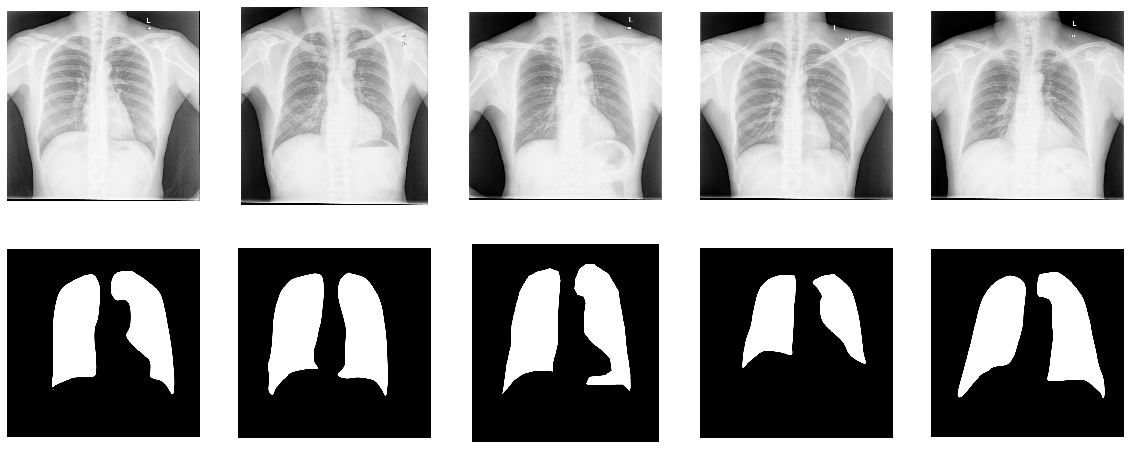

In [48]:
explorer.visualize({'lungs': lungs, 'masks': masks}, image_count=5, randomize=True, grid_size=(20, 8))


## Converting images to binary black&white

- Conversion happens
- Visualization of images in a grid

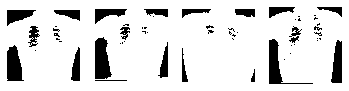

In [49]:
bw_lungs = conversion.to_blackwhite(lungs)
explorer.visualize({'bw': bw_lungs}, 4)

## Cropping of images

(737, 694, 1)


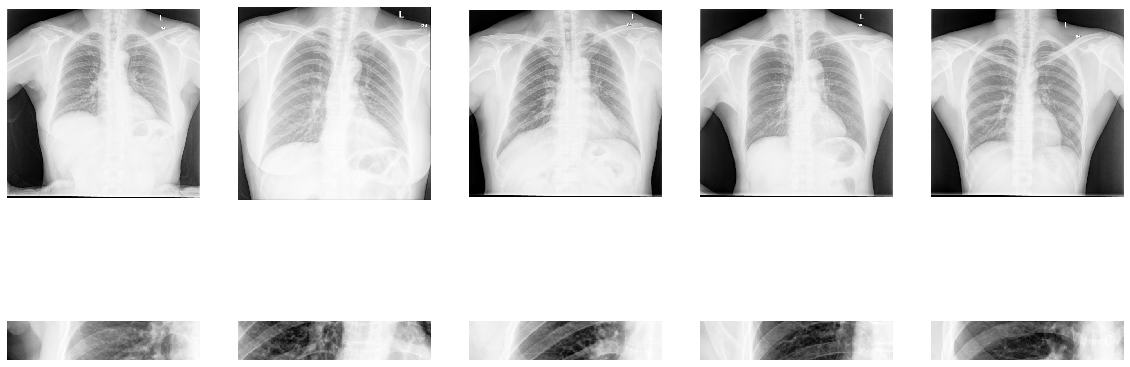

In [50]:
crops = list()
print(lungs[0].shape)
for lung in lungs:
    crops.append(conversion.crop(lung, 100, 300, 300, 60))

explorer.visualize({'lungs': lungs, 'masks': crops}, image_count=5, randomize=True, grid_size=(20, 8))

## Visualizing fragments of images

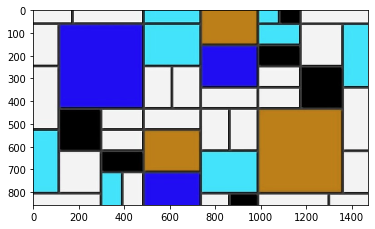

In [51]:
color_img = io.load_image_from_disk('../tests/resources/images/mondriaan.png')
explorer.show_image(color_img, False)


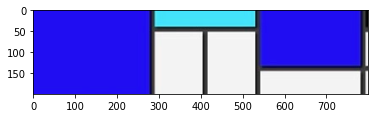

In [52]:
cropped = conversion.crop(color_img, 200, 200, 800, 200)
explorer.show_image(cropped, False)

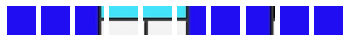

In [53]:
portions = conversion.get_fragments(color_img, (100, 100), (100, 100), (200, 200, 800, 200))
explorer.visualize({'portions': portions}, randomize=False)

## Visualizing images and their classes

In [54]:
print('Number of lung images: ', len(lungs))
classes = np.arange(1, len(lungs)+1, 1)
print(classes)

Number of lung images:  10
[ 1  2  3  4  5  6  7  8  9 10]


In [55]:
explorer.visualize_classes(lungs, classes, image_count=5)

AttributeError: 'AxesImage' object has no attribute 'text'